In [268]:
import numpy as np
from datetime import datetime
import andi
from andi import andi_datasets as AD
from sklearn.model_selection import train_test_split
from tensorflow import keras as kr
from keras import models, layers ,Sequential
from keras.layers import Dense,Conv1D,Flatten,BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

Generamos el data set con 10,000 registros, unicamente para el task 2, con 1 dimension

In [88]:
Andi = andi.andi_datasets()
print("inicio=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
X1,Y1, X2, Y2,X3,Y3=Andi.andi_dataset(min_T = 199, max_T = 200,N = 10000,dimensions = 1,tasks = 2,save_dataset = True)
print("Final=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

inicio= 02/03/2022 22:45:38
Creating a dataset for task(s) 2 and dimension(s) 1.
Generating dataset for dimension 1.


/Users/fredyvelasquez/opt/anaconda3/lib/python3.8/site-packages/fbm/fbm.py:171: UserWarning: Combination of increments n and Hurst value H invalid for Davies-Harte method. Reverting to Hosking method. Occurs when n is small and Hurst is close to 1. 
  warnings.warn(
/Users/fredyvelasquez/opt/anaconda3/lib/python3.8/site-packages/andi/diffusion_models.py:85: RuntimeWarning: overflow encountered in power
  dt = (1-np.random.rand(T))**(-1/sigma)


Final= 02/03/2022 22:46:04


El data Set ya se encuentra guardado en nuestro computador, esto nos evita estar generando un data set cada vez que ejecutemos nuestro scrip, y solo tenemos que leer la informacion que ya esta almacenada, esto lo hacemos con el parametro "load_dataset"

In [114]:
AD = andi.andi_datasets()
print("inicio=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))
X1,Y1, X2, Y2,X3,Y3=AD.andi_dataset(N = 10000,dimensions = 1,tasks = 2,load_dataset = True)
print("Final=", datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

inicio= 03/03/2022 15:40:28
Creating a dataset for task(s) 2 and dimension(s) 1.
Final= 03/03/2022 15:40:29


In [112]:
#for x in range(0,30):
#    print('Dim Trayectorioa Test:'+str(x)+' '+str(len(X2[0][x])))


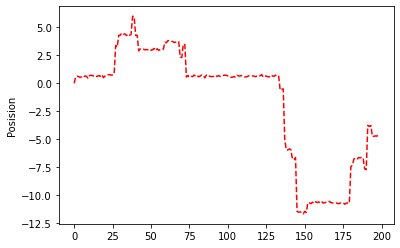

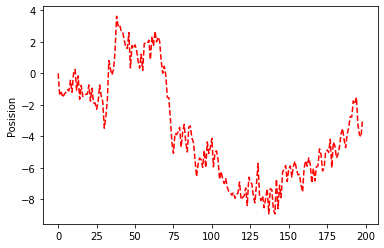

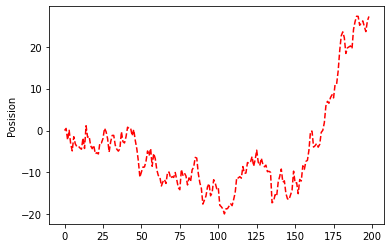

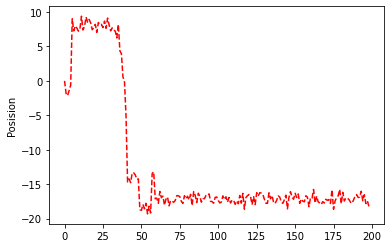

<Figure size 432x288 with 0 Axes>

In [100]:
for x in range(1,5):
    Posit = range(0,len(X2[0][x]))
    plt.plot ( Posit,X2[0][x], 'r--' ,label=str(x) )
    plt.ylabel('Posision')
    #plt.legend(AD().avail_models_name[x].upper())
    #AD().avail_models_name[int(l)].upper(), c = 'C'+str(idx)
    plt.figure()


In [ ]:
CTRW: caminata aleatoria en tiempo continuo
movimiento browniano fraccional FBM
paseo LEVY LW
Movimiento de tiempo transitorio ATTM
movimiento browniano escalado SBM

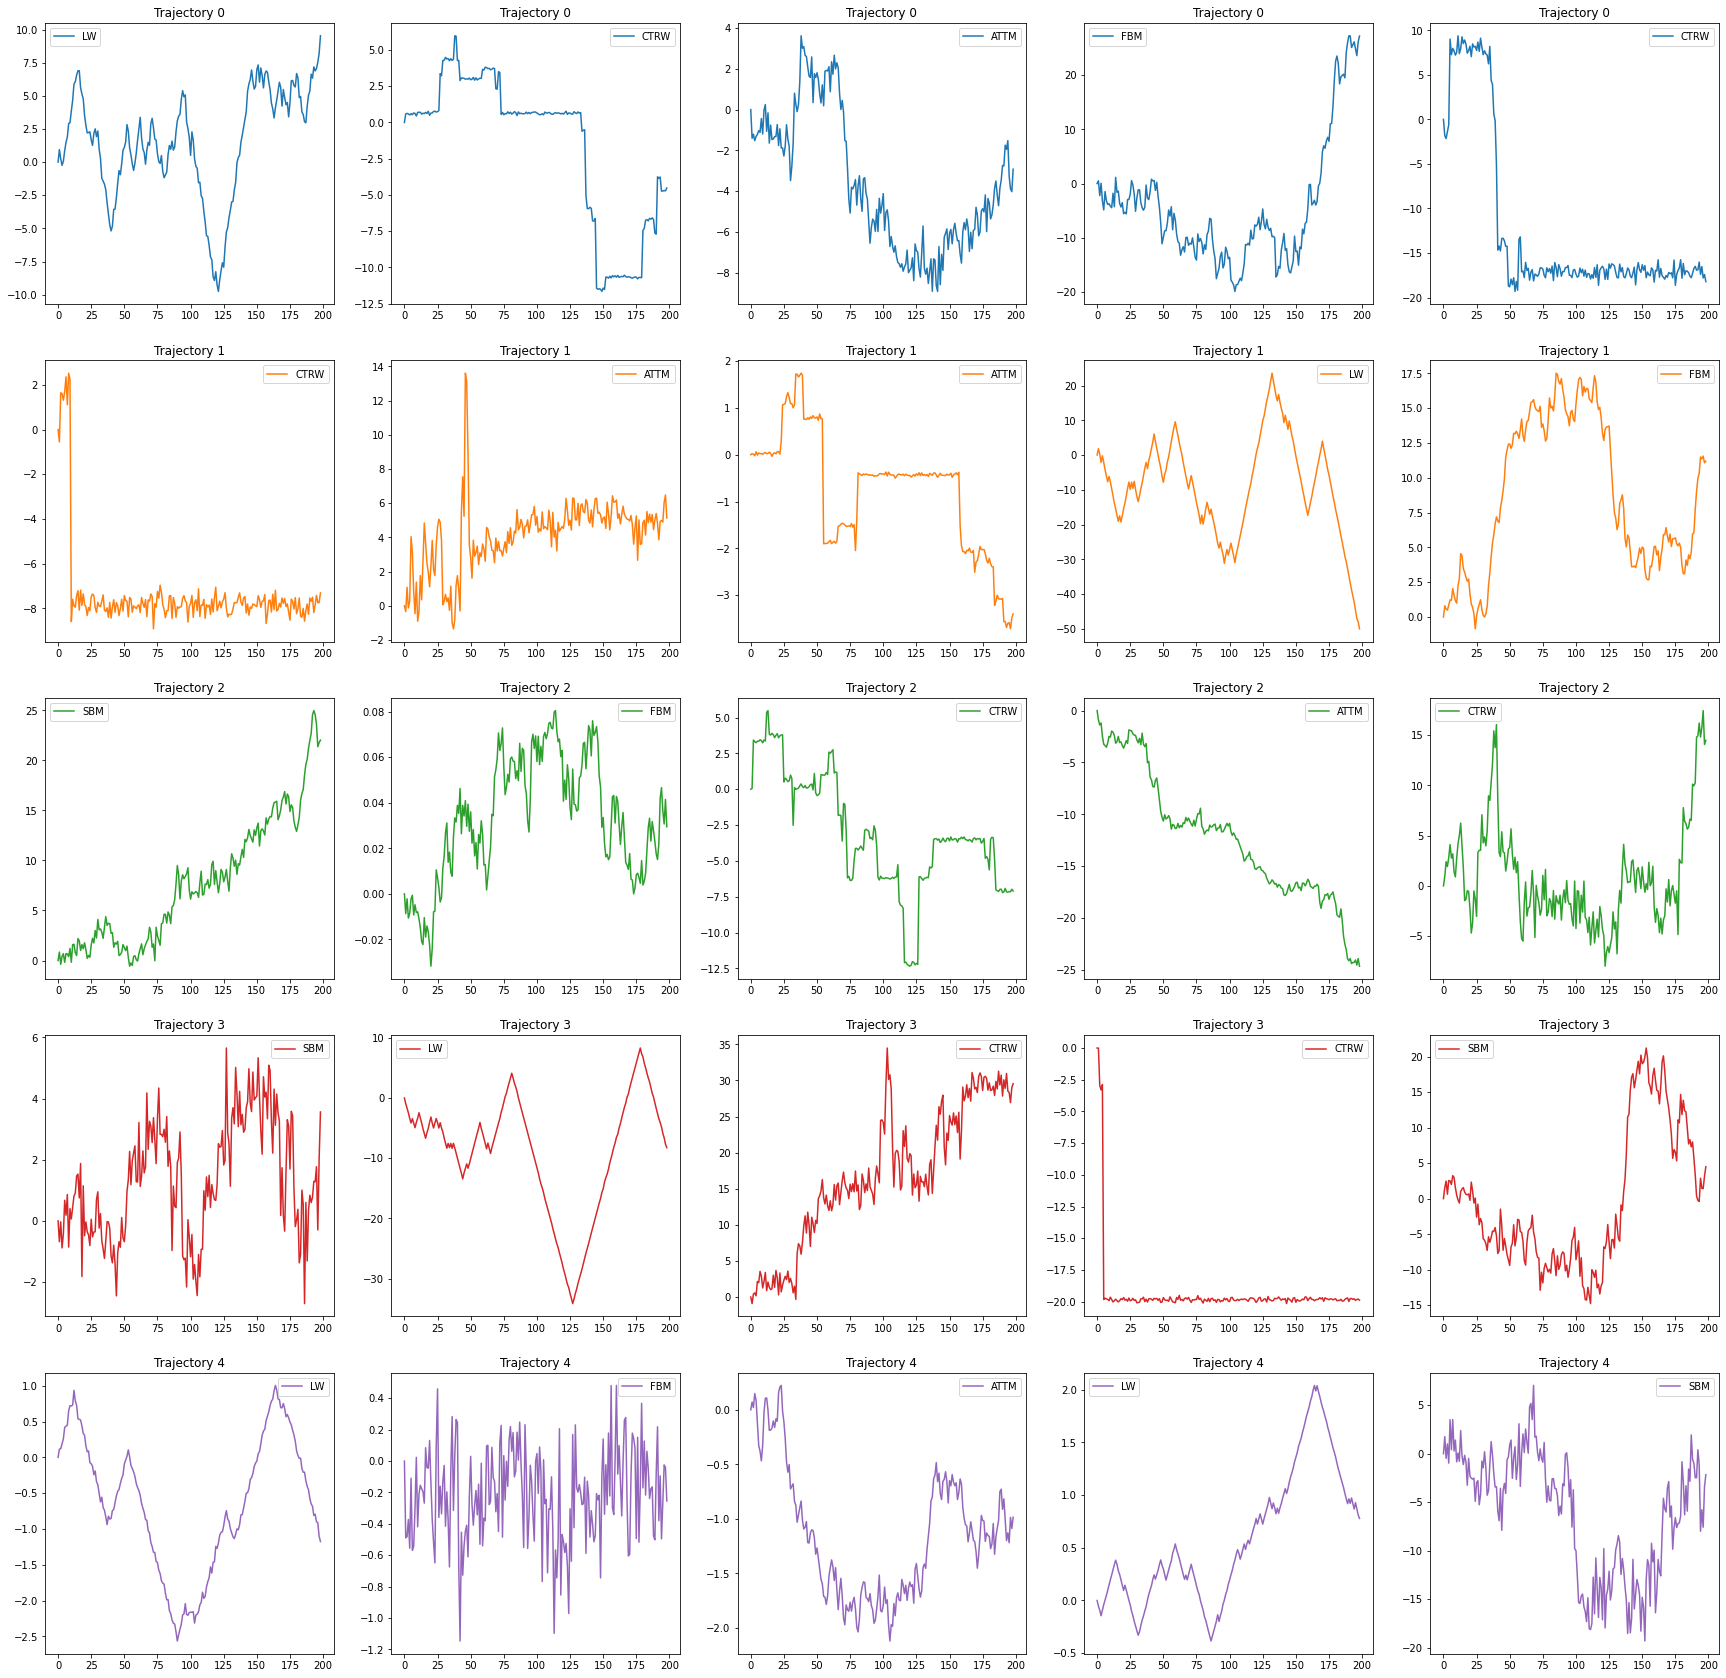

In [102]:
from andi import andi_datasets as AD
listClasif=list()
for x in range(0,len(list(X2[0]))):
    listClasif.append(X2[0][x])


#for x in range(0,len(X2[0])):
    #print(X2[0][x][0])
    #print(int(X2[0][x][0]))
    #print(Y2[0][x])
    #listClasif[int(X2[0][x][0])]

fig,ax = plt.subplots(5, 5, figsize = (30, 30)) 
cont=0
for x in range(0,5):
    for y in range(0,5):
#        print(len(listClasif[cont]))
        Posit = range(0,len(listClasif[cont]))
        ax[x][y].plot(Posit,listClasif[cont],label = AD().avail_models_name[int(Y2[0][cont])].upper(),c = 'C'+str(x))
        ax[x][y].legend()
        ax[x][y].set_title(f'Trajectory {x}')
#        ax.set_ylabel(str(x))
#        ax.figure()
        cont=cont+1

In [103]:
print('Task 2, dimension 1= '+str(len(X2[0])))

Task 2, dimension 1= 10000


In [87]:
#excluimos el primer valor de cada trayectoria, pues este indica el tipo de trayectoria, no es util en el procesamiento
#for x in range(0,len(X2[0])):
#    X2[0][x].pop(0)



In [233]:
X_train, X_test, y_train, y_test = train_test_split(X2[0],Y2[0], test_size=.2, random_state=0)
X_train_re = np.array(X_train).reshape(-1, 199, 1)
y_train_cat = to_categorical(y_train)
X_test_re = np.array(X_test).reshape(-1, 199, 1)

In [105]:
print("Train X:"+str(len(X_train)))
print("Train Y:"+str(len(y_train)))
print("Test X:"+str(len(X_test)))
print("Test Y:"+str(len(y_test)))

Train X:8000
Train Y:8000
Test X:2000
Test Y:2000


In [106]:
X_trainPad = kr.preprocessing.sequence.pad_sequences(
    X_train, padding="pre",dtype='float64'
)
X_testPad = kr.preprocessing.sequence.pad_sequences(
    X_test, padding="pre",dtype='float64'
)
for x in range(0,10):
    print('Dim Trayectorioa Test:'+str(x)+' '+str(len(X_testPad[x])))
for x in range(0,10):
    print('Dim Trayectorioa Train:'+str(x)+' '+str(len(X_trainPad[x])))

Dim Trayectorioa Test:0 199
Dim Trayectorioa Test:1 199
Dim Trayectorioa Test:2 199
Dim Trayectorioa Test:3 199
Dim Trayectorioa Test:4 199
Dim Trayectorioa Test:5 199
Dim Trayectorioa Test:6 199
Dim Trayectorioa Test:7 199
Dim Trayectorioa Test:8 199
Dim Trayectorioa Test:9 199
Dim Trayectorioa Train:0 199
Dim Trayectorioa Train:1 199
Dim Trayectorioa Train:2 199
Dim Trayectorioa Train:3 199
Dim Trayectorioa Train:4 199
Dim Trayectorioa Train:5 199
Dim Trayectorioa Train:6 199
Dim Trayectorioa Train:7 199
Dim Trayectorioa Train:8 199
Dim Trayectorioa Train:9 199


In [201]:
print(y_train_cat.shape)
print(X_train_re.shape)

(8000, 5)
(8000, 199, 1)


In [136]:
X_train_re.shape

(8000, 199, 1)

In [284]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5 ,activation='relu',input_shape=(199,1)))
#
model.add(Conv1D(filters=80, activation='relu',kernel_size=5,strides=1,kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Conv1D(filters=40, activation='relu',kernel_size=5,strides=1,  kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Conv1D(filters=20, activation='relu',kernel_size=5,strides=1,  kernel_initializer= 'uniform'))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001,center=True,scale=True))
model.add(Flatten())
model.add(Dense(5, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy','acc'])

# convertir los datos en numpy array
# reshape del nump
# label Y to categorical


In [ ]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history=model.fit(X_train_re, y_train_cat, epochs=100)

acc      = history.history[     'acc' ]
#val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' ,label='Training loss')
#plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

Epoch 1/100
250/250 [==============================] - 8s 30ms/step - loss: 1.7971 - accuracy: 0.2788 - acc: 0.2788
Epoch 2/100
250/250 [==============================] - 7s 29ms/step - loss: 1.5734 - accuracy: 0.3665 - acc: 0.3665
Epoch 3/100
250/250 [==============================] - 7s 29ms/step - loss: 1.3306 - accuracy: 0.4512 - acc: 0.4512
Epoch 4/100
250/250 [==============================] - 7s 29ms/step - loss: 1.1556 - accuracy: 0.5220 - acc: 0.5220
Epoch 5/100
250/250 [==============================] - 7s 29ms/step - loss: 1.0970 - accuracy: 0.5454 - acc: 0.5454
Epoch 6/100
250/250 [==============================] - 7s 29ms/step - loss: 1.0906 - accuracy: 0.5554 - acc: 0.5554
Epoch 7/100
250/250 [==============================] - 7s 29ms/step - loss: 0.9534 - accuracy: 0.5864 - acc: 0.5864
Epoch 8/100
250/250 [==============================] - 7s 29ms/step - loss: 0.9266 - accuracy: 0.6074 - acc: 0.6074
Epoch 9/100
250/250 [==============================] - 7s 29ms/step - lo

In [770]:
#history=model.fit(X_trainPad.tolist(), y_train, epochs=100)
#print(added_inputs.tolist()[0])


Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 1.6086 - accuracy: 0.2254 - acc: 0.2254
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5993 - accuracy: 0.2421 - acc: 0.2421
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5923 - accuracy: 0.2476 - acc: 0.2476
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5903 - accuracy: 0.2503 - acc: 0.2503
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5824 - accuracy: 0.2643 - acc: 0.2643
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5809 - accuracy: 0.2629 - acc: 0.2629
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5888 - accuracy: 0.2525 - acc: 0.2525
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 1.5834 - accuracy: 0.2675 - acc: 0.2675
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 1.581

<Figure size 432x288 with 0 Axes>

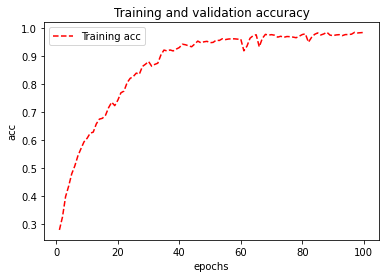

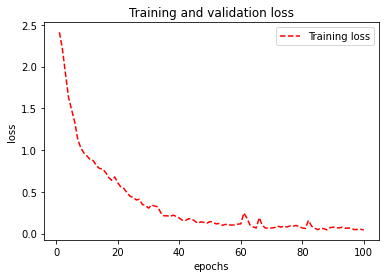

<Figure size 432x288 with 0 Axes>

In [275]:

acc      = history.history[     'acc' ]
#val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
#val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' ,label='Training loss')
#plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [279]:
y_pred = model.predict(X_test_re) 

print('accuracy: ',accuracy_score(np.array(y_test),np.argmax(y_pred, axis = 1)))
print('f1_score ',f1_score(np.array(y_test),np.argmax(y_pred, axis = 1), average='micro'))
print('Matriz de Confusion')
print(confusion_matrix(np.array(y_test),np.argmax(y_pred, axis = 1)))
#cm = confusion_matrix(y_test, y_pred)
#print (cm)

accuracy:  0.308
f1_score  0.308
Matriz de Confusion
[[ 56   0  58 201  65]
 [100   6 104  98  92]
 [ 21   0  91 231  58]
 [  1   0   4 389   6]
 [ 30   0  54 261  74]]
